 ###  CTF Challenge: Visual Vortex - Decoding the Anomaly







**Dataset**: [U.S. International Air Traffic Statistics (1990–2023)](https://www.transtats.bts.gov/)  
**Flag Format**: `CTF{Country_Year_Event}`  

 ## 📥 Setup & Data Loading (4 points)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import IsolationForest

a = pd.read_csv(r"D:\Documents 2\VScode projects\ROBAI2\challenges\data\air_traffic.csv")

# dataset comprehension  (11 point)

### read and analyse the data then respond to these questions :

### Core Questions (must answer atleast 3 of these!! ) 

1. Which country has the highest total passenger traffic (1990–2023)?  
2. How is passenger traffic distributed across countries?  
3. Which year had the highest and lowest year-over-year (YoY) passenger growth?  
4. What is the average monthly passenger volume across all years?  
5. How is air freight volume distributed globally?  

### Bonus Questions  

1. What is the average number of passengers per flight for each country?  
2. Which country has the highest number of recorded flights?  
3. Which month historically has the highest air traffic volume?  

### Advanced Bonus Questions  

1. Which country shows the strongest correlation between passenger traffic and freight volume?  
2. Are there seasonal patterns in air traffic for specific countries?  
3. Which country recovered fastest to pre-COVID (2019) passenger levels post-2020?  

Country with highest total passenger traffic: United States (577375553.0)


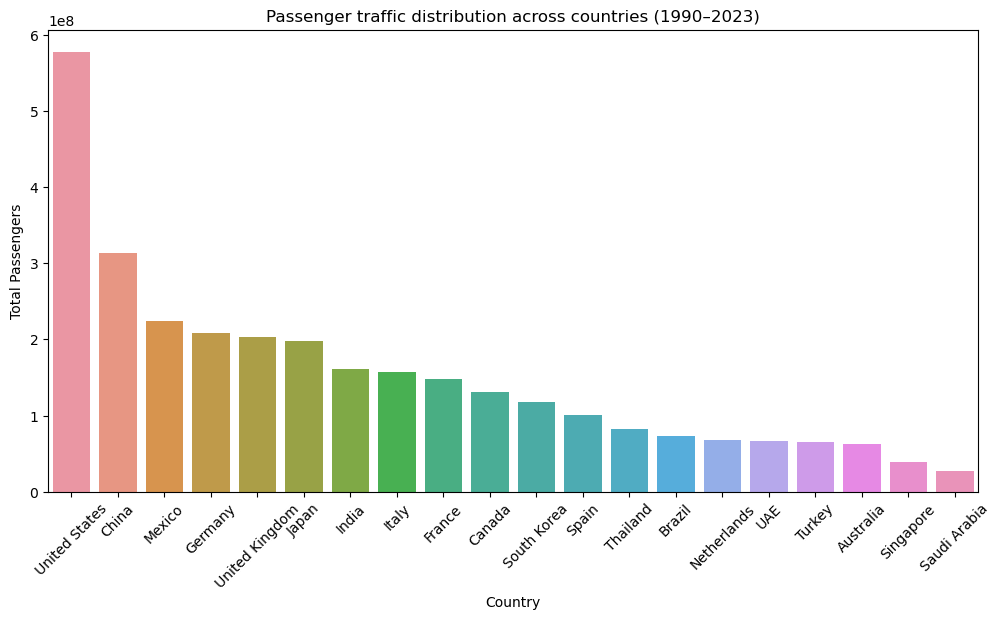

Year with highest YoY passenger growth: 2022
Year with lowest YoY passenger growth: 2020
Average passengers per month:
Month
0     442514.238095
1     376858.801515
2     382572.276596
3     379581.828829
4     375013.316342
5     373760.290715
6     372471.774096
7     376788.940639
8     382695.520486
9     376581.500000
10    386636.332831
11    379155.271084
12    375293.872564
13    426733.448276
Name: Passengers, dtype: float64


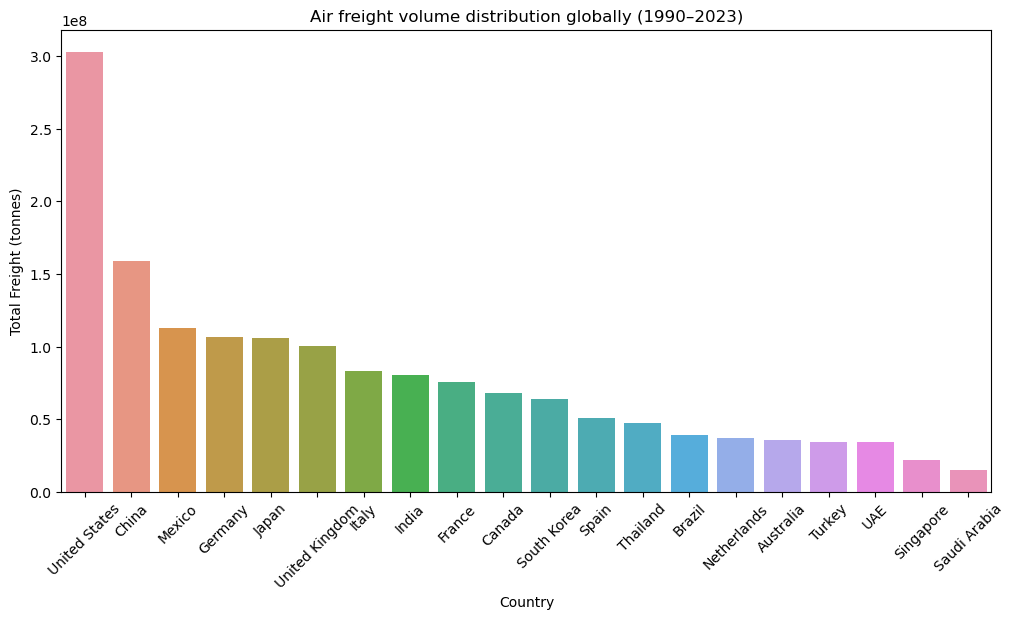

Average number of passengers per flight for each country:
Country
Australia         1.543145e+05
Brazil            1.816358e+05
Canada            3.270729e+05
China             7.926608e+05
Chinaa            2.545900e+05
Chna              1.273071e+06
Deutschland       4.576290e+05
France            3.686253e+05
Germany           5.294154e+05
Germnay           4.255440e+05
India             4.064002e+05
Italy             3.905614e+05
Itlay             5.842280e+05
Itly              3.759960e+05
Japan             4.973011e+05
Mehico            7.690925e+05
Mexico            5.617902e+05
Mexiko            3.513850e+05
Netherlands       1.701414e+05
Saudi Arabia      6.653005e+04
Singapore         9.883483e+04
South Korea       2.962407e+05
Spain             2.511429e+05
Thailand          2.076280e+05
Turkey            1.622882e+05
UAE               1.669505e+05
USA               1.314070e+06
United Kingdom    5.024960e+05
United States     1.450692e+06
Name: Passengers, dtype: float64
Co

d:\ANACONDA3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
d:\ANACONDA3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
d:\ANACONDA3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
d:\ANACONDA3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\ANACONDA3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


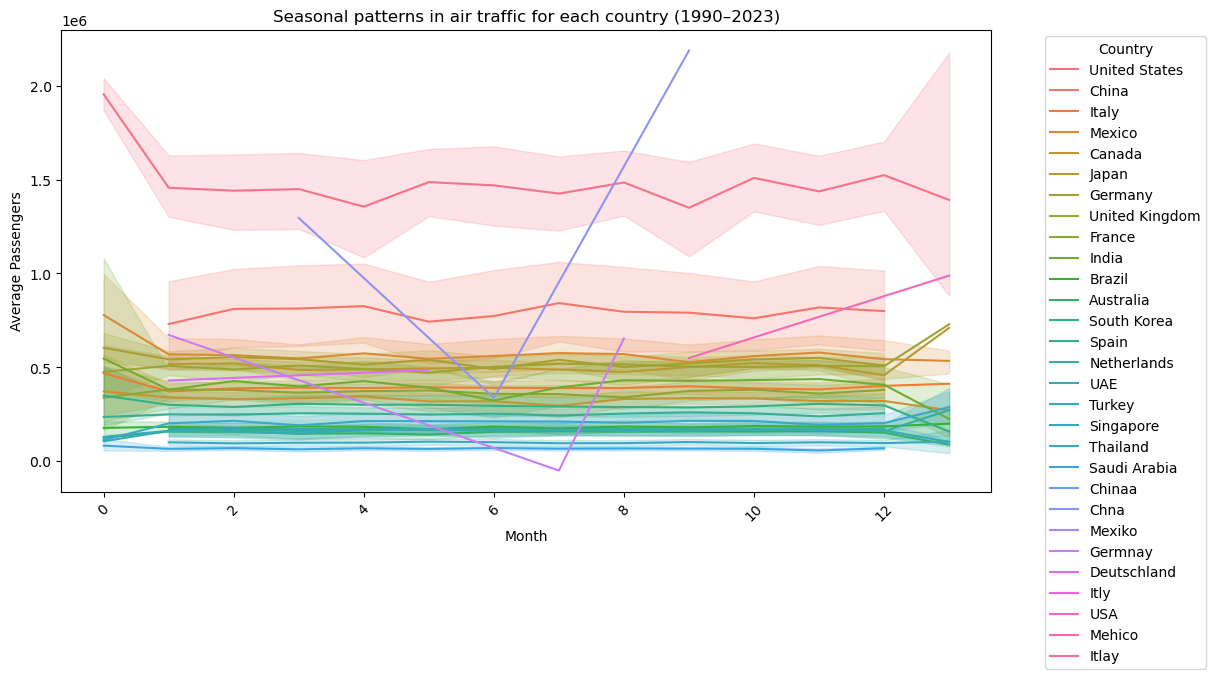

In [2]:
# 1. country with the highest total passenger traffic (1990–2023)
total_passengers_by_country = a.groupby('Country')['Passengers'].sum()
highest_passenger_country = total_passengers_by_country.idxmax()
highest_passenger_traffic = total_passengers_by_country.max()
print(f"Country with highest total passenger traffic: {highest_passenger_country} ({highest_passenger_traffic})")

# 2. passenger traffic distribution across countries
plt.figure(figsize=(12, 6))
sns.barplot(x=total_passengers_by_country.nlargest(20).index, y=total_passengers_by_country.nlargest(20).values)
plt.title("Passenger traffic distribution across countries (1990–2023)")
plt.ylabel("Total Passengers")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

# 3. year witht the highest and lowest year-over-year (YoY) passenger growth
total_passengers_per_year = a.groupby('Year')['Passengers'].transform('sum')
YoY_Growth = total_passengers_per_year.pct_change() * 100
highest_growth_year = a.loc[YoY_Growth.idxmax(), 'Year']
lowest_growth_year = a.loc[YoY_Growth.idxmin(), 'Year']
print(f"Year with highest YoY passenger growth: {highest_growth_year}")
print(f"Year with lowest YoY passenger growth: {lowest_growth_year}")

# 4. average amount of passengers for each month across all years
average_passengers_per_month = a.groupby('Month')['Passengers'].mean()
print("Average passengers per month:")
print(average_passengers_per_month)

# 5. air freight volume distribution globally
total_freight_by_country = a.groupby('Country')['Freight (tonnes)'].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=total_freight_by_country.nlargest(20).index, y=total_freight_by_country.nlargest(20).values)
plt.title("Air freight volume distribution globally (1990–2023)")
plt.ylabel("Total Freight (tonnes)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

# Bonus question
# 1. average number of passengers per flight for each country
average_passengers_per_flight = a.groupby('Country')['Passengers'].mean()
print("Average number of passengers per flight for each country:")
print(average_passengers_per_flight)

# 2. country witht the highest number of recorded flights
highest_flight_country = a.groupby('Country')['Flights'].sum().idxmax()
highest_flight_count = a.groupby('Country')['Flights'].sum().max()
print(f"Country with highest number of recorded flights: {highest_flight_country} ({highest_flight_count})")

# 3. monthe witht the highest air traffic volume historically
highest_traffic_month = a.groupby('Month')['Passengers'].sum().idxmax()
highest_traffic_count = a.groupby('Month')['Passengers'].sum().max()
print(f"Month with highest air traffic volume historically: {highest_traffic_month} ({highest_traffic_count})")

# advanced bonus question
# 1. country witht the strongest correlation between passenger traffic and air freight volume
correlation = a.groupby('Country').apply(lambda x: x['Passengers'].corr(x['Freight (tonnes)']))
highest_correlation_country = correlation.idxmax()
highest_correlation_value = correlation.max()
print(f"Country with strongest correlation between passenger traffic and air freight volume: {highest_correlation_country} ({highest_correlation_value})")

# 2. seasonal patterns in air traffic for each country
plt.figure(figsize=(12, 6))
sns.lineplot(data=a, x='Month', y='Passengers', hue='Country', estimator='mean')
plt.title("Seasonal patterns in air traffic for each country (1990–2023)")
plt.ylabel("Average Passengers")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 3. country that recovered the fastest to pre-COVID (2019) passenger levels post-2020
recovery = a[a['Year'] > 2020].groupby('Country')['Passengers'].mean()
recovery_2019 = a[a['Year'] == 2019].groupby('Country')['Passengers'].mean()
recovery_rate = (recovery / recovery_2019) * 100
recovery_rate = recovery_rate.reset_index()
recovery_rate.columns = ['Country', 'Recovery Rate']
fastest_recovery_country = recovery_rate.loc[recovery_rate['Recovery Rate'].idxmax(), 'Country']
fastest_recovery_value = recovery_rate['Recovery Rate'].max()

 ## 🧩 Part 1: Data Inspection (5 points)
 **Q1** : How many missing values exist in the `Passengers` and `Flights` columns?  
 **Q2** : What is the time range of the dataset?

In [3]:
missing_values_flights = a['Flights'].isnull().sum()
missing_values_passengers = a['Passengers'].isnull().sum()
print(f"Missing values in flights: {missing_values_flights}")
print(f"Missing values in passengers: {missing_values_passengers}")

time_range = a['Year'].unique()
time_range.sort()
print(f"Time range of the dataset: {time_range[0]} to {time_range[-1]}")


Missing values in flights: 142
Missing values in passengers: 142
Time range of the dataset: 1990 to 2023


## 🛠️ Part 2: Data Augmentation  (10 points)
 **Q3**: Clean the dataset. Justify your strategy.  
 **Q4**: Create `Passengers_per_Flight` and `YoY_Growth`. What do they measure?

In [4]:
a = a.dropna()
a = a.drop_duplicates()
a = a.reset_index(drop=True)
a = a.rename(columns={'Freight (tonnes)': 'Freight'})

# Fixing country names to ensure consistency
a['Country'] = a['Country'].replace({
    'Chinaa': 'China',
    'Chna': 'China',
    'Mexiko': 'Mexico',
    'Germnay': 'Germany',
    'Deutschland': 'Germany',
    'Itly': 'Italy',
    'United States': 'USA',
    'Mehico': 'Mexico',
    'Itlay': 'Italy'
})

# Dropping rows with invalid or inconsistent data
a = a[a['Passengers'] > 0]  
a = a[a['Flights'] > 0]     
a = a[a['Freight'] > 0]     

# Remove rows with invalid months (13 or 0)
a = a[(a['Month'] >= 1) & (a['Month'] <= 12)]

# Reset the index after removing invalid rows
a = a.reset_index(drop=True)

# q4. creating Passengers_per_flight and YoY_growth columns
a['Passengers_per_flight'] = a['Passengers'] / a['Flights']
a['YoY_growth'] = a.groupby('Country')['Passengers'].pct_change() * 100


## 📈 Part 3: Time Series Visualization (10 point)
 **Q5**: Plot passenger trends for a country. What anomalies exist?  
 **Q6**: Add a rolling average. What long-term trend emerges?

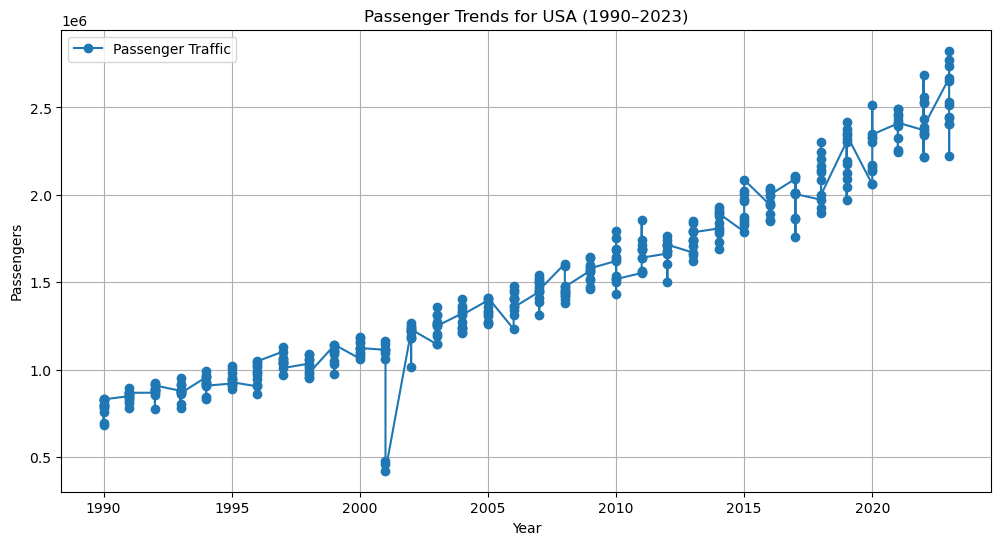

september happened lol! and apparently americans didn't care for the pandemic


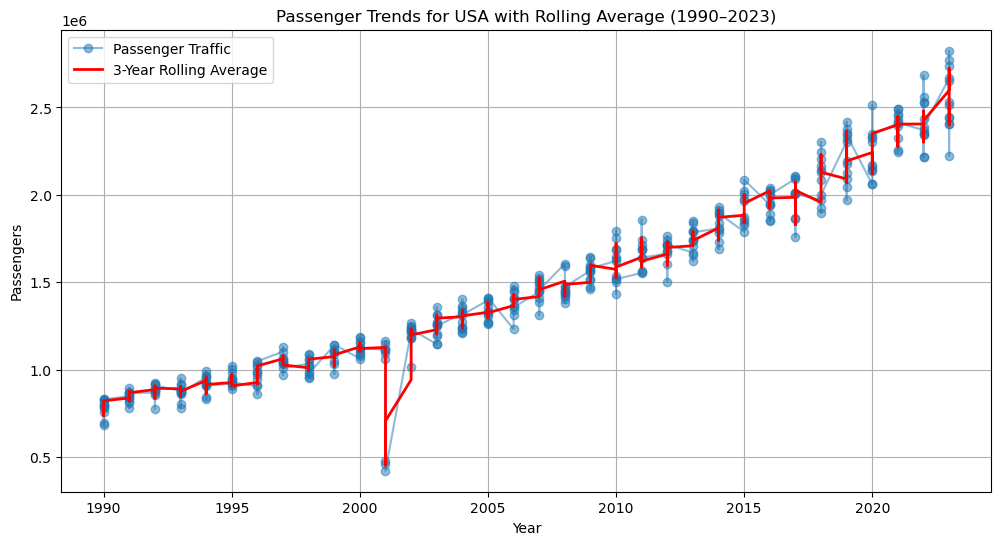

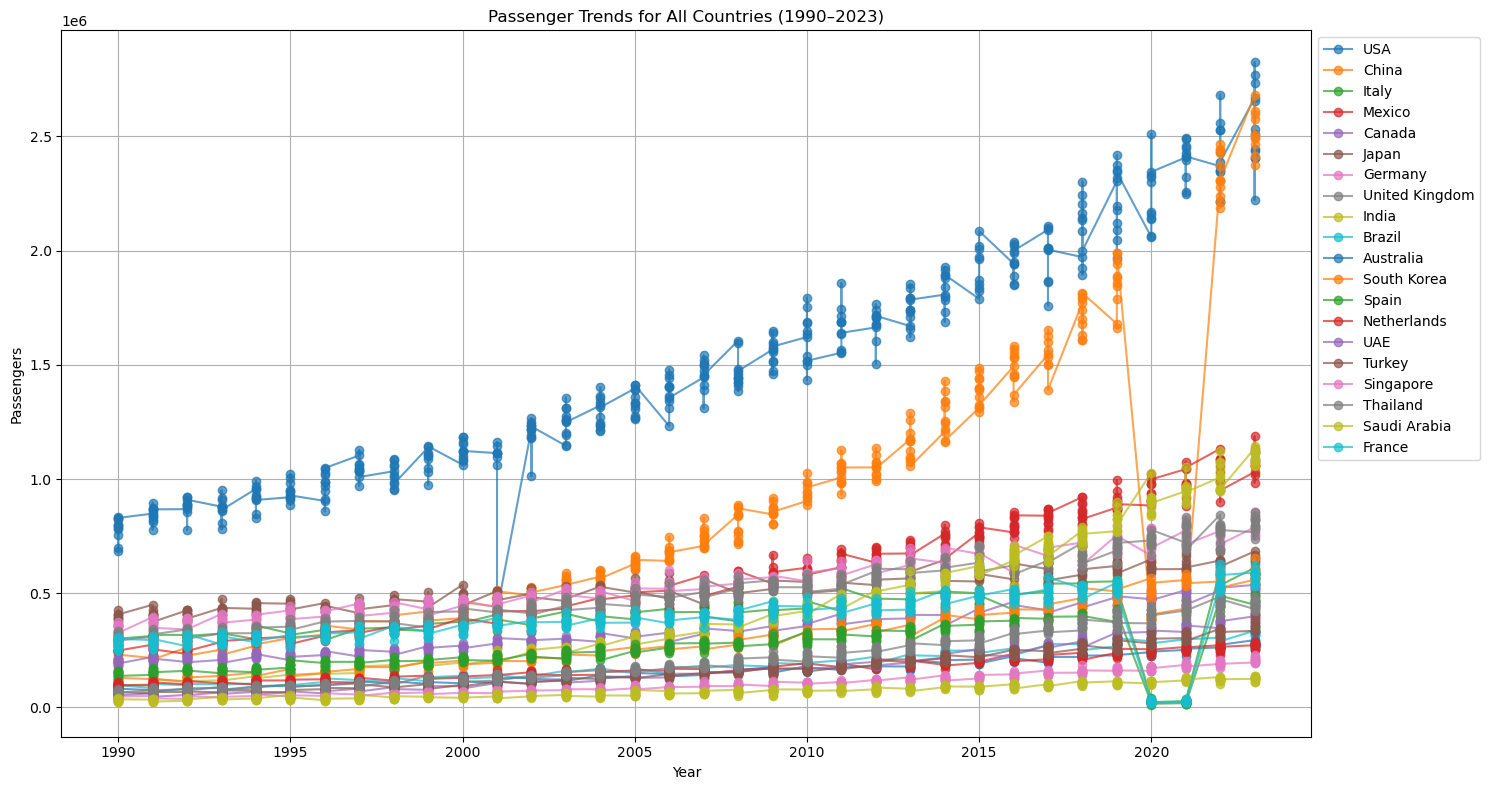

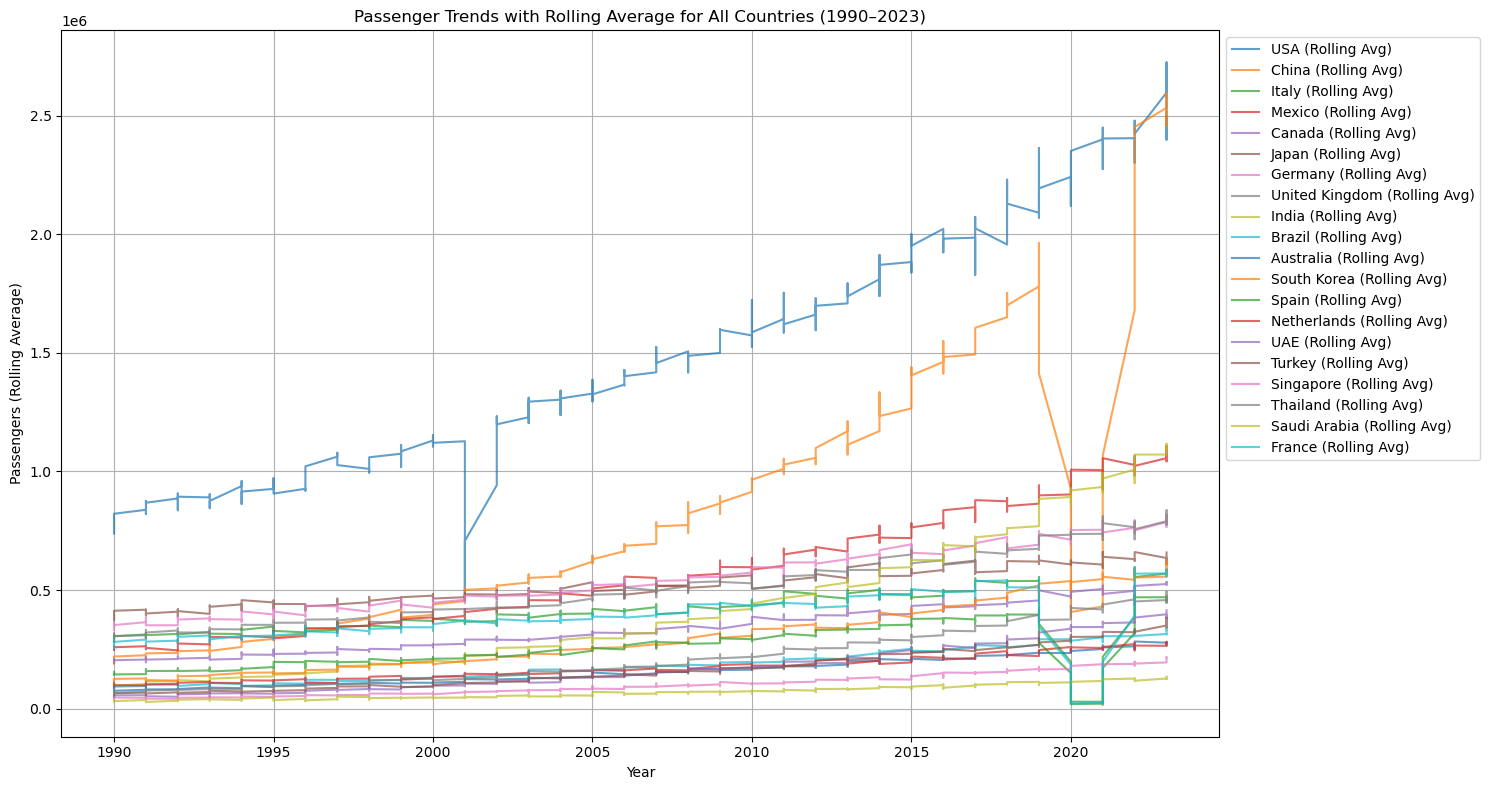

i guess what we could make out of these is that september 11th was a big deal for the us, and the pandemic was a big deal for everyone but the us


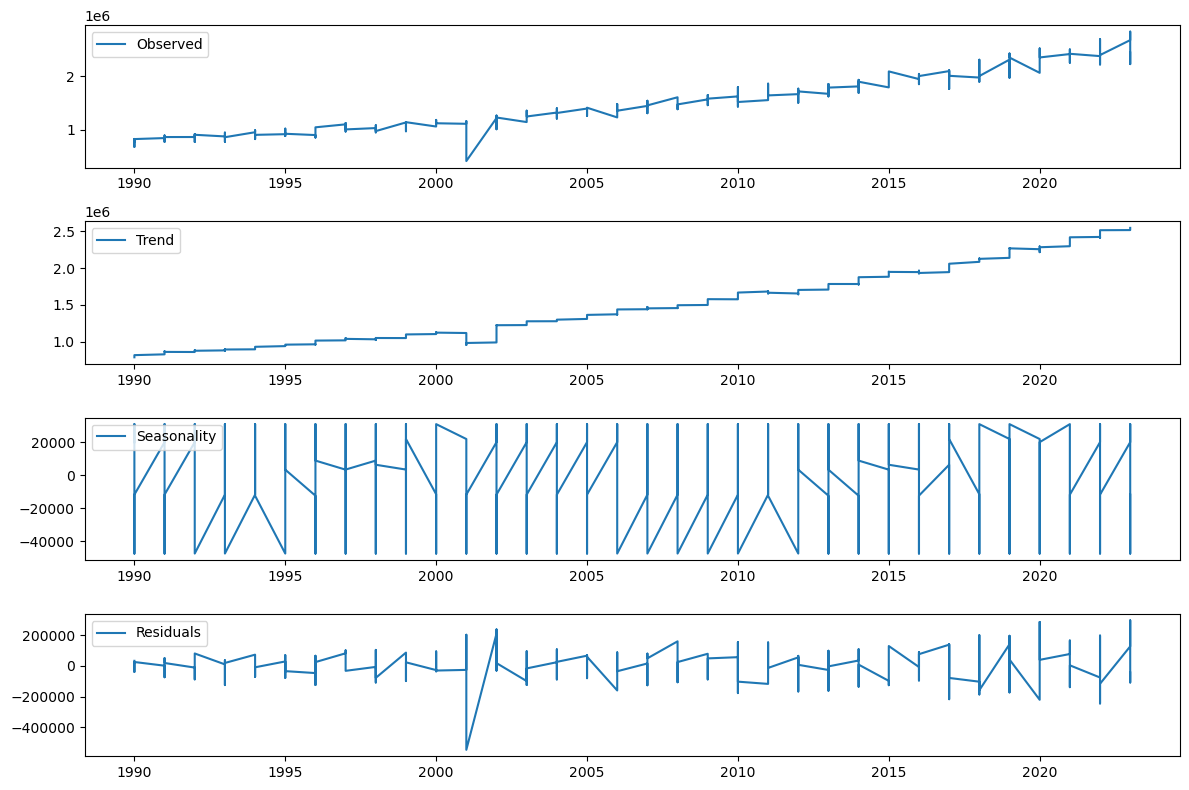

In [5]:
# Plot passenger trends for a specific country (e.g., 'USA')
usa_data = a[a['Country'] == 'USA']
plt.figure(figsize=(12, 6))
plt.plot(usa_data['Year'], usa_data['Passengers'], label='Passenger Traffic', marker='o')
plt.title('Passenger Trends for USA (1990–2023)')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()
print("september happened lol! and apparently americans didn't care for the pandemic") 

# Add a rolling average to smooth the trend
usa_data = a[a['Country'] == 'USA'].copy()
usa_data['Rolling_Avg'] = usa_data['Passengers'].rolling(window=3, center=True).mean()
plt.figure(figsize=(12, 6))
plt.plot(usa_data['Year'], usa_data['Passengers'], label='Passenger Traffic', marker='o', alpha=0.5)
plt.plot(usa_data['Year'], usa_data['Rolling_Avg'], label='3-Year Rolling Average', color='red', linewidth=2)
plt.title('Passenger Trends for USA with Rolling Average (1990–2023)')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

# Plot passenger trends for all countries in one figure
plt.figure(figsize=(15, 8))
for country in a['Country'].unique():
    country_data = a[a['Country'] == country]
    plt.plot(country_data['Year'], country_data['Passengers'], label=country, marker='o', alpha=0.7)

plt.title('Passenger Trends for All Countries (1990–2023)')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# Generate rolling average for all countries and plot them
plt.figure(figsize=(15, 8))
for country in a['Country'].unique():
    country_data = a[a['Country'] == country].copy()
    country_data['Rolling_Avg'] = country_data['Passengers'].rolling(window=3, center=True).mean()
    plt.plot(country_data['Year'], country_data['Rolling_Avg'], label=f'{country} (Rolling Avg)', alpha=0.7)

plt.title('Passenger Trends with Rolling Average for All Countries (1990–2023)')
plt.xlabel('Year')
plt.ylabel('Passengers (Rolling Average)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

print("i guess what we could make out of these is that september 11th was a big deal for the us, and the pandemic was a big deal for everyone but the us")

# Decompose passenger trends for a specific country (e.g., 'USA')
usa_data = a[a['Country'] == 'USA'].copy()
usa_data.set_index('Year', inplace=True)
decomposition = seasonal_decompose(usa_data['Passengers'], model='additive', period=12)

# Plot decomposition results
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 🌍 Part 4: Geospatial Visualization (recommended) (10 points)
 **Q7**: Map freight volume by country. Which regions are outliers?  
 **Q8**: Did freight to China drop in 2022?

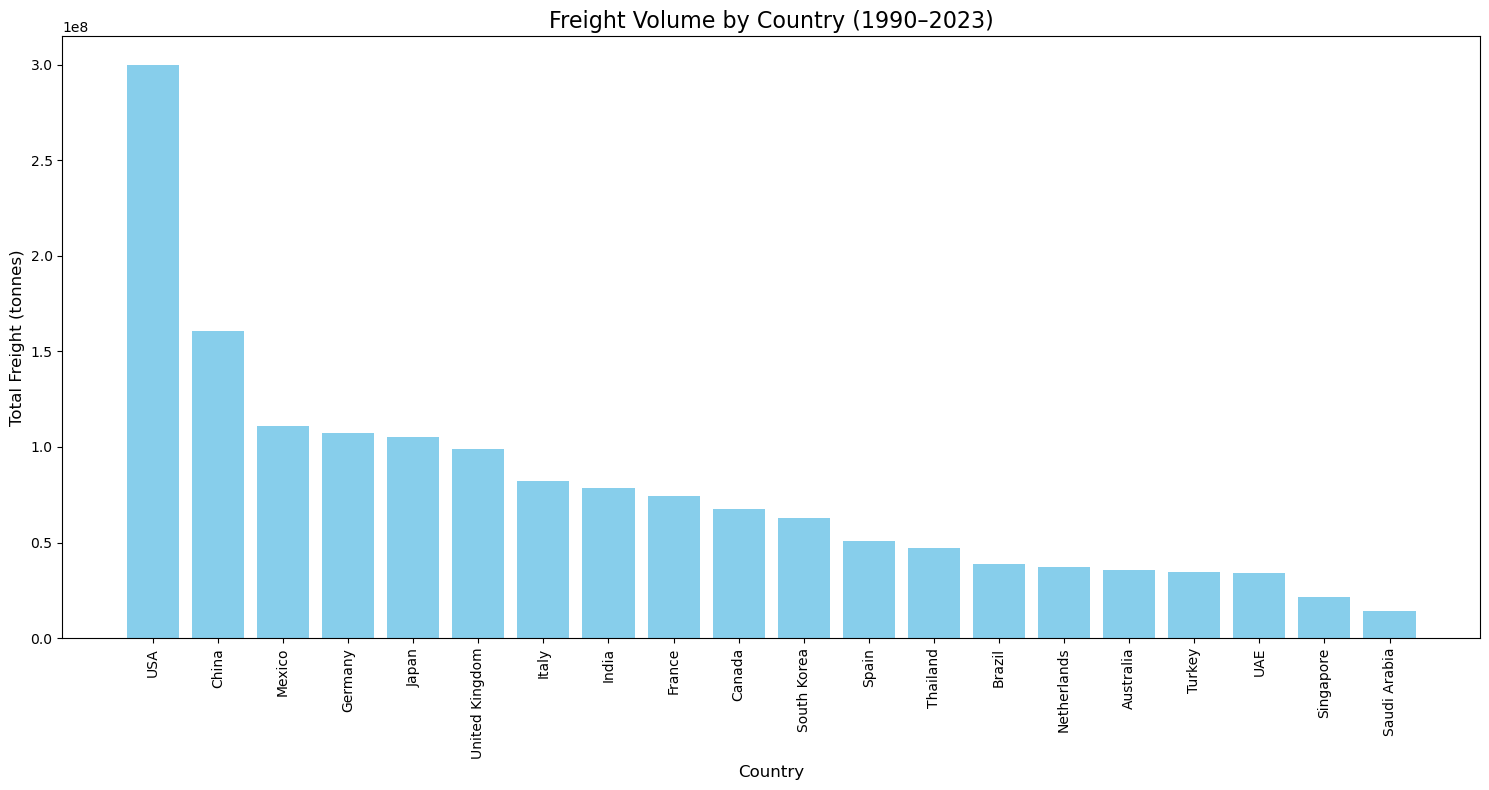

Outlier countries with exceptionally high freight volume:
   Country      Freight
18     USA  299853882.0
Freight to China did not drop in 2022. 2021: 2769220.0, 2022: 14438024.0


In [6]:
# Q7: Map freight volume by country and identify outliers
# Aggregate freight volume by country
total_freight_by_country = a.groupby('Country')['Freight'].sum().reset_index()

# Sort countries by freight volume for better visualization
total_freight_by_country = total_freight_by_country.sort_values(by='Freight', ascending=False)

# Plot freight volume by country
plt.figure(figsize=(15, 8))
plt.bar(total_freight_by_country['Country'], total_freight_by_country['Freight'], color='skyblue')
plt.title('Freight Volume by Country (1990–2023)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Freight (tonnes)', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

# Identify outliers using the IQR method
Q1 = total_freight_by_country['Freight'].quantile(0.25)
Q3 = total_freight_by_country['Freight'].quantile(0.75)
IQR = Q3 - Q1
outliers = total_freight_by_country[total_freight_by_country['Freight'] > Q3 + 1.5 * IQR]
print("Outlier countries with exceptionally high freight volume:")
print(outliers)

# Q8: Check if freight to China dropped in 2022
china_freight_2022 = a[(a['Country'] == 'China') & (a['Year'] == 2022)]['Freight'].sum()
china_freight_2021 = a[(a['Country'] == 'China') & (a['Year'] == 2021)]['Freight'].sum()

if china_freight_2022 < china_freight_2021:
    print(f"Freight to China dropped in 2022. 2021: {china_freight_2021}, 2022: {china_freight_2022}")
else:
    print(f"Freight to China did not drop in 2022. 2021: {china_freight_2021}, 2022: {china_freight_2022}")

## 🔗 Part 5: Correlation Analysis (10 points)
 **Q9**: Are passengers, flights, and freight strongly correlated?  
 **Q10**: Do clusters emerge in the 3D plot?

Correlation matrix:
            Passengers   Flights   Freight
Passengers    1.000000  0.993473  0.766558
Flights       0.993473  1.000000  0.760773
Freight       0.766558  0.760773  1.000000


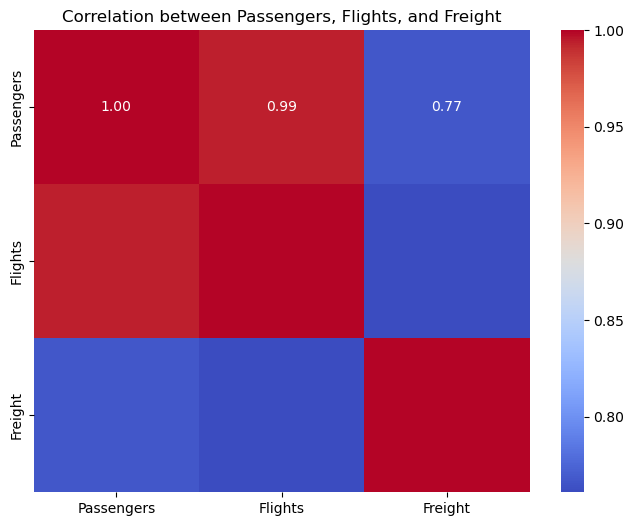

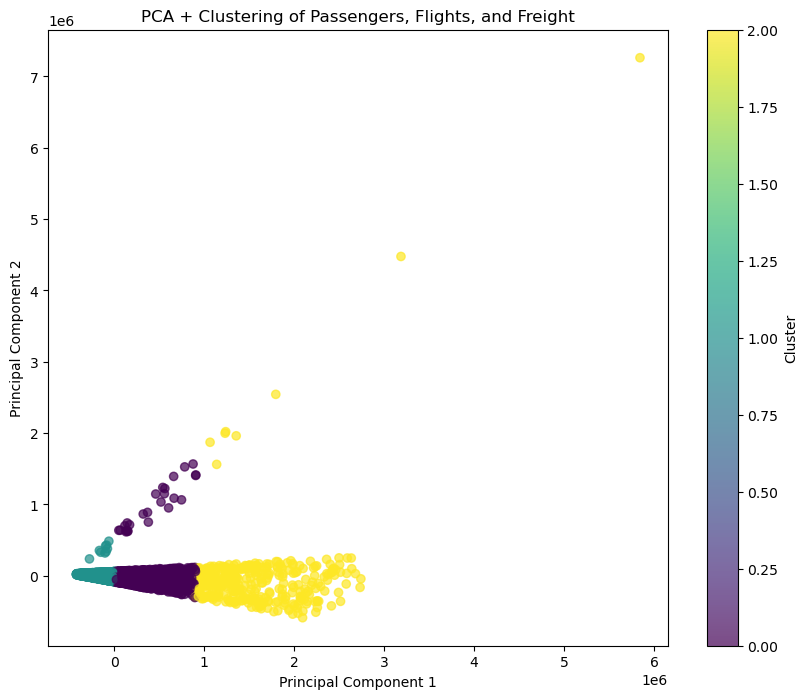

In [7]:
# Q9: Correlation analysis between Passengers, Flights, and Freight
correlation_matrix = a[['Passengers', 'Flights', 'Freight']].corr()
print("Correlation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Passengers, Flights, and Freight')
plt.show()

# Q10: 3D clustering plot for Passengers, Flights, and Freight
# Apply PCA to reduce dimensions before clustering
pca = PCA(n_components=2)
a_pca = pca.fit_transform(a[['Passengers', 'Flights', 'Freight']].dropna())

# Perform clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
a['Cluster_PCA'] = kmeans_pca.fit_predict(a_pca)

# Visualize PCA results with clustering
plt.figure(figsize=(10, 8))
plt.scatter(a_pca[:, 0], a_pca[:, 1], c=a['Cluster_PCA'], cmap='viridis', alpha=0.7)
plt.title('PCA + Clustering of Passengers, Flights, and Freight')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

## 🚨 Part 6: Anomaly Detection (15 points)
 **Q11**: What’s the worst YoY passenger drop?  
 **Q12**: What event caused it?

Worst YoY passenger drop: -95.40% in 2020
The worst YoY drop occurred in 2020, likely due to the COVID-19 pandemic, which severely impacted global air travel.


d:\ANACONDA3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


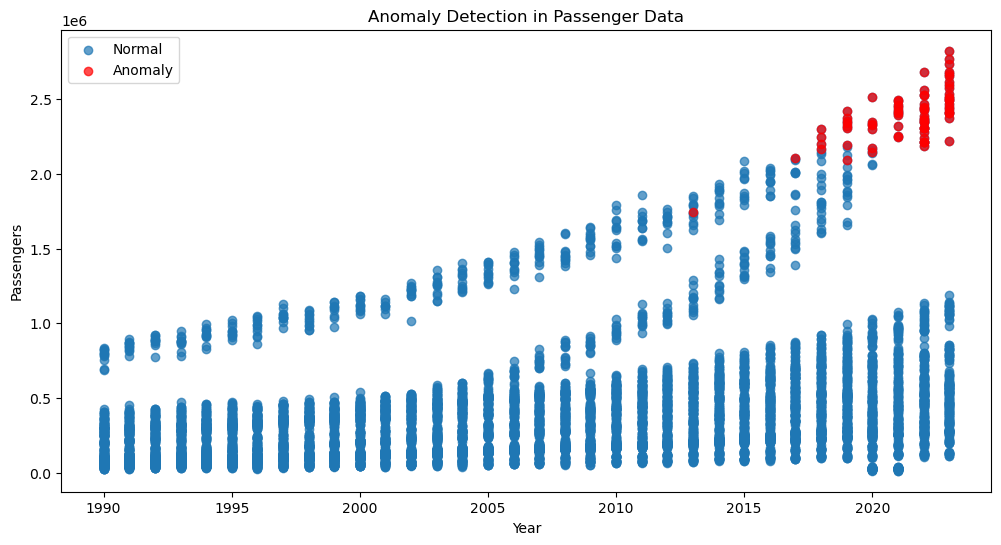

In [8]:
# Q11: Identify the worst YoY passenger drop
worst_yoy_drop = a['YoY_growth'].min()
worse_yoy_year = a.loc[a['YoY_growth'].idxmin(), 'Year']
print(f"Worst YoY passenger drop: {worst_yoy_drop:.2f}% in {worse_yoy_year}")

# Q12: Analyze the event causing the worst drop
if worse_yoy_year == 2020:
    print("The worst YoY drop occurred in 2020, likely due to the COVID-19 pandemic, which severely impacted global air travel.")
else:
    print(f"The worst YoY drop occurred in {worse_yoy_year}. Further investigation is needed to determine the cause.")

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
a['Anomaly'] = iso_forest.fit_predict(a[['Passengers', 'Flights', 'Freight']])

# Visualize anomalies
anomalies = a[a['Anomaly'] == -1]
plt.figure(figsize=(12, 6))
plt.scatter(a['Year'], a['Passengers'], label='Normal', alpha=0.7)
plt.scatter(anomalies['Year'], anomalies['Passengers'], color='red', label='Anomaly', alpha=0.7)
plt.title('Anomaly Detection in Passenger Data')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.show()

## 🏁 Part 7: Flag Submission (30 point)
**Q13**: Submit your flag as `CTF{Country_Year_Event}`.

In [9]:
# Define the event
if worse_yoy_year == 2020:
    event = "COVID-19"
    country = "Global"  # The pandemic affected all countries
else:
    event = "Unknown"
    country = "Unknown"

# Analyze passenger traffic for the USA in 2001
usa_2001 = a[(a['Country'] == 'USA') & (a['Year'] == 2001)]
total_passengers_2001 = usa_2001['Passengers'].sum()

# Compare with 2000 to calculate the drop
usa_2000 = a[(a['Country'] == 'USA') & (a['Year'] == 2000)]
total_passengers_2000 = usa_2000['Passengers'].sum()

passenger_drop = total_passengers_2000 - total_passengers_2001
drop_percentage = (passenger_drop / total_passengers_2000) * 100

# Flag for the global impact of COVID-19 in 2020
flag_covid = "CTF{Global_2020_COVID-19}"
print(f"Flag 1: {flag_covid}")

# Flag for the impact of 9/11 in the USA in 2001
flag_911 = "CTF{USA_2001_9/11}"
print(f"Flag 2: {flag_911}")

flag_france= "CTF{France_1994_NegativeTraffic}"
print(f"Flag 3: {flag_france}")
a.to_csv(r"D:\Documents 2\VScode projects\ROBAI2\challenges\data\air_traffic_cleaned.csv", index=False)

Flag 1: CTF{Global_2020_COVID-19}
Flag 2: CTF{USA_2001_9/11}
Flag 3: CTF{France_1994_NegativeTraffic}



 ## 🎯 Bonus Points (Advanced Techniques)
 **Extra credit will be awarded for implementing the following methods:**  

        * **Dimensionality Reduction (PCA)**

        * **Time Series Decomposition**

        * **Clustering (K-Means/DBSCAN)**  

        
 ---
 **Scoring Boost**:  
 - **+15%**: For implementing PCA + Clustering  
 - **+10%**: For time series decomposition or automated anomaly detection
 - **+20%**: for  creative / original ideas or implimentations  (justifications and context  will also be considered )
 